## 科技动量因子

In [7]:
import pickle
import pandas as pd
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_df.pkl', 'rb') as f:
    stock_df = pickle.load(f)
start_date = '2010-01-06'
end_date = '2024-12-27'
valid_dates = [d for d in stock_df.index if (d >= start_date and d <= end_date)]
# 月末日期
month_ends = sorted(list(set([d[:7] for d in valid_dates])))
month_end_dates = [max([d for d in valid_dates if d[:7] == m]) for m in month_ends]
month_end_dates

# 年末日期
year_ends = sorted(list(set([d[:4] for d in valid_dates])))
year_end_dates = [max([d for d in valid_dates if d[:4] == y]) for y in year_ends]
print(year_end_dates)

# 季度末日期
quarter_ends = sorted(list(set([d[:4] + '-' + str((int(d[5:7])-1)//3*3+3).zfill(2) for d in valid_dates])))
quarter_end_dates = []
for q in quarter_ends:
    year = q[:4]
    month = q[5:7]
    if month in ['03', '06', '09', '12']:
        quarter_dates = [d for d in valid_dates if d[:4] == year and d[5:7] == month]
        if quarter_dates:
            quarter_end_dates.append(max(quarter_dates))

quarter_end_dates = sorted(quarter_end_dates)
print(quarter_end_dates)

['2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-30', '2017-12-29', '2018-12-28', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30', '2023-12-29', '2024-12-27']
['2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-30', '2012-03-30', '2012-06-29', '2012-09-28', '2012-12-31', '2013-03-29', '2013-06-28', '2013-09-30', '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31', '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-30', '2018-06-29', '2018-09-28', '2018-12-28', '2019-03-29', '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-30', '2023-03-31', '2023-06-30', '2023-09-28', '2023-12-29', '202

In [2]:
## 处理IPC数据
df_patent = pd.read_feather(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\parent_sub_company_patents.feather')

# 数据预处理：展开IPC代码
patent_expanded = []
for _, row in df_patent.iterrows():
    if pd.notna(row['category_num_ipc']):
        ipc_codes = str(row['category_num_ipc']).split(';')
        for code in ipc_codes:
            if len(code.strip()) >= 3:
                patent_expanded.append({
                    'company': row['related_ticker_symbol'],
                    'date': row['outhor_date'],
                    'ipc': code.strip()[:3]
                })

patent_df = pd.DataFrame(patent_expanded)
patent_df['date'] = pd.to_datetime(patent_df['date'])

# 获取所有IPC分类和公司
all_ipc_classes = sorted(patent_df['ipc'].unique())
companies = sorted(patent_df['company'].unique())

print(f"IPC分类: {len(all_ipc_classes)} 个, 公司: {len(companies)} 家")

IPC分类: 125 个, 公司: 4620 家


In [22]:
df_patent

,related_ticker_symbol,ename,outhor_date,outhor_num,request_date,category_num_ipc,create_time
0,002655,山东共达电声股份有限公司,2010-01-06,CN101621728,2009-06-25,H04R29/00(2006.01)I,2012-02-17 15:32:26
1,603867,浙江新化化工股份有限公司,2010-01-06,CN101619025,2009-07-29,C07C211/07(2006.01)I;C07C209/16(2006.01)I;B01J...,2019-06-27 11:33:32
2,603867,浙江新化化工股份有限公司,2010-01-06,CN101619026,2009-07-29,C07C211/35(2006.01)I;C07C209/16(2006.01)I;B01J...,2019-06-27 13:41:20
3,300216,湖南千山制药机械股份有限公司,2010-01-06,CN101618770,2009-08-17,B65B29/00(2006.01)I;B65B31/00(2006.01)I;B65B55...,2011-05-11 10:26:07
4,600570,恒生电子股份有限公司,2010-01-06,CN101620549,2009-08-13,G06F9/46(2006.01)I,2010-01-06 10:32:00
...,...,...,...,...,...,...,...
1191342,300925,深圳市法本信息技术股份有限公司,2024-12-27,CN119210906A,2024-11-27,H04L9/40(2022.01);H04L9/32(2006.01);H04L67/12(...,2025-05-15 16:48:19
1191343,300750,宁德时代新能源科技股份有限公司,2024-12-27,CN119198771A,2024-11-05,G01N21/95(2006.01),2025-05-19 23:49:37
1191344,301091,深圳市城市交通规划设计研究中心股份有限公司,2024-12-27,CN119200652A,2024-11-27,G05D1/46(2024.01);G05D109/20(2024.01),2025-05-22 16:47:20
1191345,600900,中国长江电力股份有限公司,2024-12-27,CN119193172A,2024-08-12,C09K23/00(2022.01);C02F1/40(2023.01);C09K23/42...,2025-06-06 00:44:05


In [3]:
patent_df[patent_df['company']=='000001']

,company,date,ipc
107334,000001,2011-12-07,G06
107335,000001,2011-12-07,G07
235635,000001,2013-06-05,H04
235636,000001,2013-06-05,H04
235637,000001,2013-06-05,G06
...,...,...,...
3504198,000001,2024-12-27,G06
3504199,000001,2024-12-27,G06
3504200,000001,2024-12-27,G06
3504201,000001,2024-12-27,G06


In [4]:
import numpy as np
def get_all_tech_vectors_fast(stock_list, date, patent_df, all_ipc_classes):
    """向量化计算所有股票的技术向量"""
    # 筛选日期
    recent_patents = patent_df[patent_df['date'] <= pd.to_datetime(date)]
    
    if recent_patents.empty:
        return np.zeros((len(stock_list), len(all_ipc_classes)))
    
    # 使用crosstab快速计算
    tech_matrix = pd.crosstab(recent_patents['company'], recent_patents['ipc'])
    
    # 确保包含所有股票和IPC分类
    tech_matrix = tech_matrix.reindex(index=stock_list, columns=all_ipc_classes, fill_value=0)
    
    return tech_matrix.values

In [5]:
## 对齐股票，找到df_patent与stock_df共同的股票
stock_columns = set(stock_df.columns)
tech_companies = set(companies)
common_stocks = sorted(list(stock_columns.intersection(tech_companies)))
stock_df_filtered = stock_df[common_stocks]
len(common_stocks)

4602

In [6]:
common_stocks

['000001',
 '000002',
 '000005',
 '000008',
 '000012',
 '000016',
 '000017',
 '000019',
 '000021',
 '000024',
 '000026',
 '000027',
 '000030',
 '000032',
 '000035',
 '000037',
 '000038',
 '000039',
 '000040',
 '000050',
 '000055',
 '000059',
 '000060',
 '000061',
 '000063',
 '000065',
 '000066',
 '000070',
 '000078',
 '000089',
 '000090',
 '000099',
 '000100',
 '000151',
 '000153',
 '000156',
 '000157',
 '000158',
 '000301',
 '000333',
 '000338',
 '000400',
 '000401',
 '000402',
 '000404',
 '000407',
 '000409',
 '000410',
 '000413',
 '000418',
 '000420',
 '000422',
 '000423',
 '000425',
 '000429',
 '000488',
 '000498',
 '000504',
 '000510',
 '000511',
 '000513',
 '000515',
 '000518',
 '000521',
 '000522',
 '000523',
 '000525',
 '000527',
 '000528',
 '000530',
 '000536',
 '000538',
 '000539',
 '000541',
 '000543',
 '000544',
 '000546',
 '000550',
 '000551',
 '000552',
 '000553',
 '000559',
 '000561',
 '000565',
 '000566',
 '000568',
 '000569',
 '000570',
 '000572',
 '000581',
 '000584',

In [9]:
## 开始计算科技动量因子
tech_momentum_factor = pd.DataFrame(index=quarter_end_dates[1:], columns=common_stocks, dtype=float)
tech_momentum_factor

,000001,000002,000005,000008,000012,000016,000017,000019,000021,000024,...,688793,688798,688799,688800,688819,833819,835179,835305,835640,836239
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
def get_year_end(current_date, year_end_dates):
    valid_dates = [d for d in year_end_dates if d >= current_date]
    return valid_dates[0] if valid_dates else None
# test
current_date = '2017-06-30'
latest = get_year_end(current_date, year_end_dates)
print(latest) 

2017-12-29


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
def safe_matmul(matrix, vector):
    """安全的矩阵乘法，处理数值问题"""
    # 检查并清理无效值
    matrix_clean = np.nan_to_num(matrix, nan=0.0, posinf=0.0, neginf=0.0)
    vector_clean = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    
    # 限制数值范围避免溢出
    matrix_clean = np.clip(matrix_clean, -1e10, 1e10)
    vector_clean = np.clip(vector_clean, -1e10, 1e10)
    
    return matrix_clean @ vector_clean
for i, current_date in enumerate(tqdm(quarter_end_dates[1:], desc="计算因子")):
    prev_date = quarter_end_dates[i]
    # 计算月收益率/季度
    current_prices = stock_df_filtered.loc[current_date]
    prev_prices = stock_df_filtered.loc[prev_date]
    monthly_ret = (current_prices / prev_prices - 1)
    # 处理NaN值：用0代替缺失值
    monthly_ret = monthly_ret.fillna(0)
    current_prices = current_prices.fillna(0)
    prev_prices = prev_prices.fillna(0)
    # 现在所有股票都是"有效"的（因为NaN已经被0替代）
    valid_stocks = common_stocks
    valid_monthly_ret = monthly_ret.values
    temp_year = get_year_end(current_date, year_end_dates)
    #print(f"temp_year: {temp_year}")
    tech_vectors = get_all_tech_vectors_fast(common_stocks, temp_year, patent_df, all_ipc_classes)
    # 检查是否有技术数据
    has_tech_mask = tech_vectors.sum(axis=1) > 0 #current_date之前所有股票125类别中有不为0类别的股票数目
    if has_tech_mask.sum() < 5:  # 如果有技术数据的股票太少，跳过
        tech_momentum_factor.loc[current_date] = np.nan
        continue
    # 只保留有技术数据的股票
    final_mask = has_tech_mask
    final_stocks = [valid_stocks[j] for j in range(len(valid_stocks)) if final_mask[j]]
    final_monthly_ret = valid_monthly_ret[final_mask]
    final_tech_vectors = tech_vectors[final_mask]

    corr_matrix = cosine_similarity(final_tech_vectors)
     # 排除自己
    np.fill_diagonal(corr_matrix, 0) 
    weights_sum = corr_matrix.sum(axis=1)
    result = safe_matmul(corr_matrix, final_monthly_ret)
    tech_momentum_values_final = np.where(
    weights_sum > 1e-6,
    result / weights_sum,
    np.nan
    )
    # 将结果映射回完整的股票列表
    result_values = np.full(len(common_stocks), np.nan)
    for j, stock in enumerate(final_stocks):
        stock_idx = common_stocks.index(stock)
        result_values[stock_idx] = tech_momentum_values_final[j]
    
    tech_momentum_factor.loc[current_date] = result_values
print(f"科技动量因子完成: {tech_momentum_factor.shape}")

计算因子: 100%|██████████| 59/59 [01:23<00:00,  1.41s/it]

科技动量因子完成: (59, 4602)


In [18]:
tech_momentum_factor

,000001,000002,000005,000008,000012,000016,000017,000019,000021,000024,...,688793,688798,688799,688800,688819,833819,835179,835305,835640,836239
2010-06-30,NaN,-2.358106,NaN,NaN,-0.405874,-0.499671,NaN,NaN,-0.262330,NaN,...,-0.398822,-0.223649,NaN,NaN,-0.151263,NaN,NaN,NaN,NaN,NaN
2010-09-30,NaN,-0.039792,NaN,NaN,-0.183713,-0.209093,NaN,NaN,-0.167418,NaN,...,0.282978,-0.747703,NaN,NaN,-0.339978,NaN,NaN,NaN,NaN,NaN
2010-12-31,NaN,0.278123,NaN,NaN,0.227046,-0.413867,NaN,NaN,0.211313,NaN,...,-0.387292,0.393103,NaN,NaN,0.000722,NaN,NaN,NaN,NaN,NaN
2011-03-31,-0.428564,0.573820,NaN,-0.636137,-0.578908,-0.584184,NaN,NaN,-0.529861,NaN,...,-0.526831,-0.519288,-0.315345,NaN,-0.465159,NaN,NaN,NaN,NaN,NaN
2011-06-30,0.112927,-0.372218,NaN,0.103518,-0.386324,0.015797,NaN,NaN,-0.139201,NaN,...,-0.347141,-0.034215,-0.441568,NaN,-0.563211,NaN,NaN,NaN,NaN,NaN
2011-09-30,-0.319648,-0.696207,NaN,0.123084,-1.372248,0.102527,NaN,NaN,-0.162674,NaN,...,-0.264531,0.023830,-0.220696,NaN,-0.193137,NaN,NaN,NaN,NaN,NaN
2011-12-30,-0.523854,-0.707119,NaN,-0.242911,-0.328795,-0.269921,NaN,NaN,-0.196294,NaN,...,-0.004488,-0.153367,-0.101761,NaN,0.389432,NaN,NaN,NaN,NaN,NaN
2012-03-30,-0.696005,-0.563735,NaN,-0.167399,-0.529836,-0.274779,NaN,NaN,-0.365764,NaN,...,-0.567752,-0.300249,-0.664252,-0.441057,-0.451363,NaN,NaN,NaN,NaN,NaN
2012-06-29,-0.410393,-0.818940,NaN,-0.387714,-0.495001,-0.384739,NaN,NaN,-0.429125,NaN,...,-0.183363,-0.396664,-0.203160,-0.490980,-0.511825,NaN,NaN,NaN,NaN,NaN
2012-09-28,0.091613,0.183053,NaN,0.169457,0.159185,0.143265,NaN,NaN,0.085089,NaN,...,0.164746,0.180664,0.134332,0.259597,0.255444,NaN,NaN,NaN,NaN,NaN


In [20]:
import config
## 行业中性化
#tech_momentum_factor2=config.neutralize(tech_momentum_factor,ind=True)

load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-09-01 极端市场，不调仓
2016-01-04 极端市场，不调仓
2020-02-03 极端市场，不调仓
多头超额:
             2010   2011   2012   2013   2014   2015   2016    2017    2018  \
年化超额   0.1767 0.1160 0.0015 0.2744 0.0934 0.4034 0.1306 -0.1488 -0.0199   
波动率     0.0840 0.0405 0.0549 0.0766 0.0554 0.1091 0.0619  0.0604  0.0737   
最大回撤   0.0371 0.0213 0.0568 0.0281 0.0506 0.0713 0.0595  0.1787  0.0763   
夏普率     2.1049 2.8623 0.0267 3.5838 1.6854 3.6978 2.1087 -2.4617 -0.2702   
收益回撤比 4.7684 5.4442 0.0258 9.7546 1.8464 5.6547 2.1958 -0.8324 -0.2611   
半波       0.0291 0.0212 0.0315 0.0432 0.0315 0.0644 0.0374  0.0420  0.0471   
半夏普     6.0661 5.4781 0.0465 6.3500 2.9687 6.2663 3.4947 -3.5377 -0.4227   

             2019   2020   2021   2022   2023    2024   mean  
年化超额   0.0368 0.0217 0.1157 0.0382 0.2106 -0.0070 0.0962  
波动率     0.0585 0.0983 0.1152 0.1165 0.0808  0.2386 0.0883  
最大回撤   0.0712 0.0621 0.0928 0.0826 

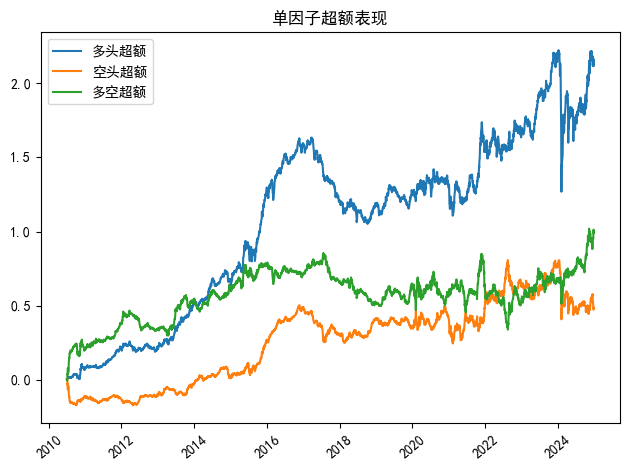

平均单边换手：0.286
年化交易成本:0.011 (未在超额中扣除)


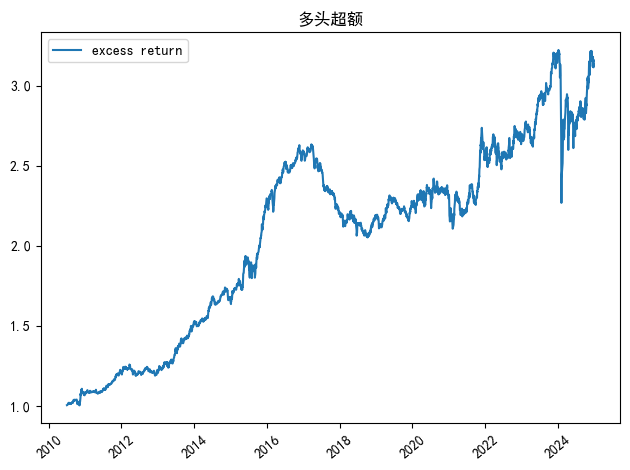

Rank IC: 0.71%
Rank ICIR: 0.09
t值: 1.15
年化收益率: 9.62%
年化波动率: 8.83%
信息比率: 1.09
最大回撤: 34.05%


In [21]:
res=config.backtest_stand(tech_momentum_factor,top=300,fre='month',stock_pool='888888')
# Rank IC
rank_ic = res['ic']['ic'].mean()
# Rank ICIR
rank_icir = res['ic']['ic'].mean() / res['ic']['ic'].std()
# t值
t_value = res['ic']['ic'].mean() / (res['ic']['ic'].std() / np.sqrt(res['ic']['ic'].count()))
perf = res['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

## 同行业 & 非同行业

In [ ]:
## 同行业科技动量因子
tech_momentum_factor_same_industry = pd.DataFrame(index=quarter_end_dates[1:], columns=common_stocks, dtype=float)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
with open(r"C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_ind.pkl", 'rb') as f:
    stock_ind = pickle.load(f)
def safe_matmul(matrix, vector):
    """安全的矩阵乘法，处理数值问题"""
    # 检查并清理无效值
    matrix_clean = np.nan_to_num(matrix, nan=0.0, posinf=0.0, neginf=0.0)
    vector_clean = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    
    # 限制数值范围避免溢出
    matrix_clean = np.clip(matrix_clean, -1e10, 1e10)
    vector_clean = np.clip(vector_clean, -1e10, 1e10)
    
    return matrix_clean @ vector_clean
for i, current_date in enumerate(tqdm(quarter_end_dates[1:], desc="计算因子")):
    prev_date = quarter_end_dates[i]
    # 计算月收益率/季度
    current_prices = stock_df_filtered.loc[current_date]
    prev_prices = stock_df_filtered.loc[prev_date]
    monthly_ret = (current_prices / prev_prices - 1)
    # 处理NaN值：用0代替缺失值
    monthly_ret = monthly_ret.fillna(0)
    current_prices = current_prices.fillna(0)
    prev_prices = prev_prices.fillna(0)
    # 现在所有股票都是"有效"的（因为NaN已经被0替代）
    valid_stocks = common_stocks
    valid_monthly_ret = monthly_ret.values
    temp_year = get_year_end(current_date, year_end_dates)
    #print(f"temp_year: {temp_year}")
    tech_vectors = get_all_tech_vectors_fast(common_stocks, temp_year, patent_df, all_ipc_classes)
    # 检查是否有技术数据
    has_tech_mask = tech_vectors.sum(axis=1) > 0 #current_date之前所有股票125类别中有不为0类别的股票数目
    if has_tech_mask.sum() < 5:  # 如果有技术数据的股票太少，跳过
        tech_momentum_factor_same_industry.loc[current_date] = np.nan
        continue
    # 只保留有技术数据的股票
    final_mask = has_tech_mask
    final_stocks = [valid_stocks[j] for j in range(len(valid_stocks)) if final_mask[j]]
    final_monthly_ret = valid_monthly_ret[final_mask]
    final_tech_vectors = tech_vectors[final_mask]
    final_industries = stock_ind.loc[current_date][final_stocks].values

    corr_matrix = cosine_similarity(final_tech_vectors)
    # 排除自己
    np.fill_diagonal(corr_matrix, 0) 

    # 排除非同行业
    industry_matrix_i = final_industries[:, np.newaxis]  # 列向量
    industry_matrix_j = final_industries[np.newaxis, :]  # 行向量
    valid_mask = ~(pd.isna(industry_matrix_i) | pd.isna(industry_matrix_j))
    same_industry_mask = (industry_matrix_i == industry_matrix_j) & ~np.eye(len(final_stocks), dtype=bool) & valid_mask
    corr_matrix = corr_matrix * same_industry_mask
    
    weights_sum = corr_matrix.sum(axis=1)
    result = safe_matmul(corr_matrix, final_monthly_ret)
    tech_momentum_values_final = np.where(
    weights_sum > 1e-6,
    result / weights_sum,
    np.nan
    )
    # 将结果映射回完整的股票列表
    result_values = np.full(len(common_stocks), np.nan)
    for j, stock in enumerate(final_stocks):
        stock_idx = common_stocks.index(stock)
        result_values[stock_idx] = tech_momentum_values_final[j]
    
    tech_momentum_factor_same_industry.loc[current_date] = result_values
print(f"科技动量因子完成(同行业): {tech_momentum_factor_same_industry.shape}")

计算因子: 100%|██████████| 59/59 [02:10<00:00,  2.21s/it]

科技动量因子完成(同行业): (59, 4602)


In [35]:
tech_momentum_factor_same_industry

,000001,000002,000005,000008,000012,000016,000017,000019,000021,000024,000026,000027,000030,000032,000035,000037,000038,000039,000040,000050,...,688768,688772,688776,688777,688778,688779,688786,688787,688788,688789,688793,688798,688799,688800,688819,833819,835179,835305,835640,836239
2010-06-30,nan,-3.6667,nan,nan,-1.7706,0.4082,nan,nan,-0.8305,nan,nan,nan,nan,-0.1392,nan,nan,nan,-0.9258,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-09-30,nan,11.0417,nan,nan,2.2416,-2.7467,nan,nan,-0.2708,nan,nan,nan,nan,-0.6029,nan,nan,nan,-0.9193,nan,-7.1218,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010-12-31,nan,-0.7370,nan,nan,-0.1509,0.0196,nan,nan,0.6780,nan,nan,nan,nan,-0.2647,nan,nan,nan,0.5078,nan,0.2186,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-03-31,-2.2744,nan,nan,-2.0119,-1.7606,-1.0530,nan,nan,-0.6494,nan,nan,nan,nan,-0.8986,nan,nan,nan,-1.4911,nan,-2.0606,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-06-30,-1.3412,-4.2373,nan,-0.7674,-1.1748,-1.4252,nan,nan,-1.3474,nan,nan,nan,nan,-2.0078,nan,nan,nan,-1.1998,nan,-0.6054,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-09-30,-1.4124,-0.9162,nan,-0.7107,-14.6919,-0.4918,nan,nan,-1.7042,nan,nan,nan,-1.7368,-2.0572,nan,nan,nan,-1.5110,nan,0.8253,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-12-30,-1.1498,7.3750,nan,-1.8261,-1.8566,-1.3522,nan,nan,0.8164,nan,nan,nan,-1.8261,0.9905,nan,nan,nan,-1.0877,nan,-0.3555,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-03-30,0.7756,-0.1841,nan,nan,-0.6661,-0.3847,nan,nan,-1.6851,nan,nan,nan,0.6667,-1.2353,nan,nan,nan,-1.3479,nan,-1.8448,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-06-29,0.0967,-0.4449,nan,0.3895,0.1066,-1.2948,nan,nan,-2.2101,nan,nan,nan,0.3895,-2.5022,nan,nan,nan,-1.2029,nan,2.3550,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-09-28,0.1437,1.5374,nan,0.9545,-0.0263,0.3064,nan,nan,0.3970,nan,nan,nan,0.9545,0.0795,nan,nan,nan,1.2956,nan,0.6120,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-09-01 极端市场，不调仓
2016-01-04 极端市场，不调仓
2020-02-03 极端市场，不调仓
多头超额:
             2010   2011   2012   2013   2014   2015   2016    2017   2018  \
年化超额   0.0659 0.1164 0.0258 0.2294 0.0512 0.4446 0.1247 -0.1206 0.0067   
波动率     0.0814 0.0485 0.0592 0.0738 0.0588 0.1142 0.0643  0.0583 0.0791   
最大回撤   0.0460 0.0385 0.0586 0.0353 0.0818 0.0837 0.0665  0.1455 0.0702   
夏普率     0.8092 2.4008 0.4354 3.1109 0.8702 3.8929 1.9381 -2.0694 0.0843   
收益回撤比 1.4305 3.0246 0.4401 6.4939 0.6251 5.3117 1.8756 -0.8287 0.0950   
半波       0.0293 0.0257 0.0328 0.0414 0.0380 0.0685 0.0398  0.0401 0.0493   
半夏普     2.2457 4.5299 0.7861 5.5379 1.3446 6.4934 3.1356 -3.0096 0.1354   

             2019   2020    2021   2022   2023    2024   mean  
年化超额   0.0425 0.0062 -0.0676 0.1403 0.2735 -0.0192 0.0880  
波动率     0.0533 0.0839  0.1114 0.1101 0.1050  0.2236 0.0883  
最大回撤   0.0696 0.0854  0.1409 0.0494 0.06

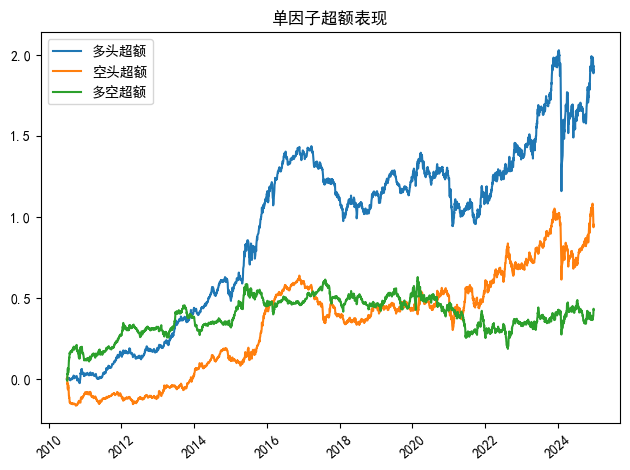

平均单边换手：0.295
年化交易成本:0.011 (未在超额中扣除)


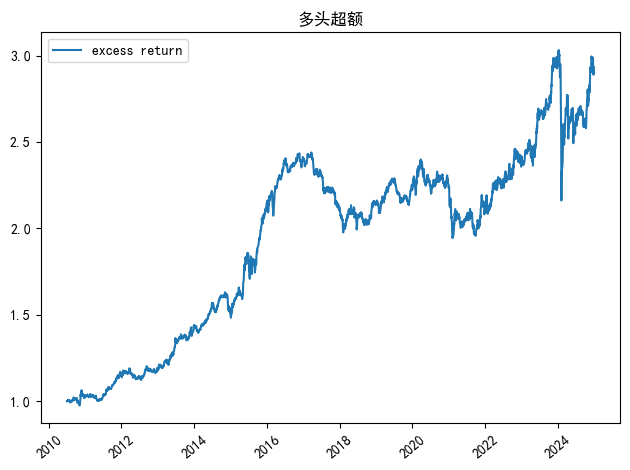

Rank IC: 0.33%
Rank ICIR: 0.04
t值: 0.58
年化收益率: 8.80%
年化波动率: 8.83%
信息比率: 1.00
最大回撤: 32.90%


In [36]:
res2=config.backtest_stand(tech_momentum_factor_same_industry,top=300,fre='month',stock_pool='888888')
# Rank IC
rank_ic = res2['ic']['ic'].mean()
# Rank ICIR
rank_icir = res2['ic']['ic'].mean() / res2['ic']['ic'].std()
# t值
t_value = res2['ic']['ic'].mean() / (res2['ic']['ic'].std() / np.sqrt(res2['ic']['ic'].count()))
perf = res2['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

In [37]:
## 非同行业科技动量因子
tech_momentum_factor_diff_industry = pd.DataFrame(index=quarter_end_dates[1:], columns=common_stocks, dtype=float)

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
def safe_matmul(matrix, vector):
    """安全的矩阵乘法，处理数值问题"""
    # 检查并清理无效值
    matrix_clean = np.nan_to_num(matrix, nan=0.0, posinf=0.0, neginf=0.0)
    vector_clean = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    
    # 限制数值范围避免溢出
    matrix_clean = np.clip(matrix_clean, -1e10, 1e10)
    vector_clean = np.clip(vector_clean, -1e10, 1e10)
    
    return matrix_clean @ vector_clean
for i, current_date in enumerate(tqdm(quarter_end_dates[1:], desc="计算因子")):
    prev_date = quarter_end_dates[i]
    # 计算月收益率/季度
    current_prices = stock_df_filtered.loc[current_date]
    prev_prices = stock_df_filtered.loc[prev_date]
    monthly_ret = (current_prices / prev_prices - 1)
    # 处理NaN值：用0代替缺失值
    monthly_ret = monthly_ret.fillna(0)
    current_prices = current_prices.fillna(0)
    prev_prices = prev_prices.fillna(0)
    # 现在所有股票都是"有效"的（因为NaN已经被0替代）
    valid_stocks = common_stocks
    valid_monthly_ret = monthly_ret.values
    temp_year = get_year_end(current_date, year_end_dates)
    #print(f"temp_year: {temp_year}")
    tech_vectors = get_all_tech_vectors_fast(common_stocks, temp_year, patent_df, all_ipc_classes)
    # 检查是否有技术数据
    has_tech_mask = tech_vectors.sum(axis=1) > 0 #current_date之前所有股票125类别中有不为0类别的股票数目
    if has_tech_mask.sum() < 5:  # 如果有技术数据的股票太少，跳过
        tech_momentum_factor_diff_industry.loc[current_date] = np.nan
        continue
    # 只保留有技术数据的股票
    final_mask = has_tech_mask
    final_stocks = [valid_stocks[j] for j in range(len(valid_stocks)) if final_mask[j]]
    final_monthly_ret = valid_monthly_ret[final_mask]
    final_tech_vectors = tech_vectors[final_mask]
    final_industries = stock_ind.loc[current_date][final_stocks].values

    corr_matrix = cosine_similarity(final_tech_vectors)
    # 排除自己
    np.fill_diagonal(corr_matrix, 0) 

    # 排除同行业
    industry_matrix_i = final_industries[:, np.newaxis]  # 列向量
    industry_matrix_j = final_industries[np.newaxis, :]  # 行向量
    valid_mask = ~(pd.isna(industry_matrix_i) | pd.isna(industry_matrix_j))
    diff_industry_mask = (industry_matrix_i != industry_matrix_j) & ~np.eye(len(final_stocks), dtype=bool) & valid_mask
    corr_matrix = corr_matrix * diff_industry_mask
    
    weights_sum = corr_matrix.sum(axis=1)
    result = safe_matmul(corr_matrix, final_monthly_ret)
    tech_momentum_values_final = np.where(
    weights_sum > 1e-6,
    result / weights_sum,
    np.nan
    )
    # 将结果映射回完整的股票列表
    result_values = np.full(len(common_stocks), np.nan)
    for j, stock in enumerate(final_stocks):
        stock_idx = common_stocks.index(stock)
        result_values[stock_idx] = tech_momentum_values_final[j]
    
    tech_momentum_factor_diff_industry.loc[current_date] = result_values
print(f"科技动量因子完成(非同行业行业): {tech_momentum_factor_diff_industry.shape}")

计算因子: 100%|██████████| 59/59 [02:15<00:00,  2.29s/it]

科技动量因子完成(非同行业行业): (59, 4602)


load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-09-01 极端市场，不调仓
2016-01-04 极端市场，不调仓
2020-02-03 极端市场，不调仓
多头超额:
              2010   2011    2012   2013   2014   2015   2016    2017    2018  \
年化超额    0.2145 0.0728 -0.0236 0.2782 0.0485 0.3604 0.1150 -0.1510 -0.0004   
波动率      0.0571 0.0395  0.0542 0.0724 0.0580 0.0839 0.0495  0.0552  0.0692   
最大回撤    0.0139 0.0286  0.0563 0.0315 0.0553 0.0528 0.0414  0.1659  0.0712   
夏普率      3.7590 1.8413 -0.4362 3.8431 0.8360 4.2965 2.3235 -2.7365 -0.0053   
收益回撤比 15.4106 2.5475 -0.4194 8.8243 0.8772 6.8307 2.7748 -0.9103 -0.0051   
半波        0.0209 0.0214  0.0324 0.0403 0.0335 0.0473 0.0294  0.0392  0.0442   
半夏普     10.2705 3.4066 -0.7287 6.9019 1.4476 7.6248 3.9132 -3.8566 -0.0083   

             2019   2020   2021   2022   2023    2024   mean  
年化超额   0.0149 0.0057 0.1682 0.0243 0.1699 -0.0501 0.0831  
波动率     0.0571 0.0907 0.1066 0.1113 0.0774  0.2306 0.0808  
最大回撤   0.0765 0.070

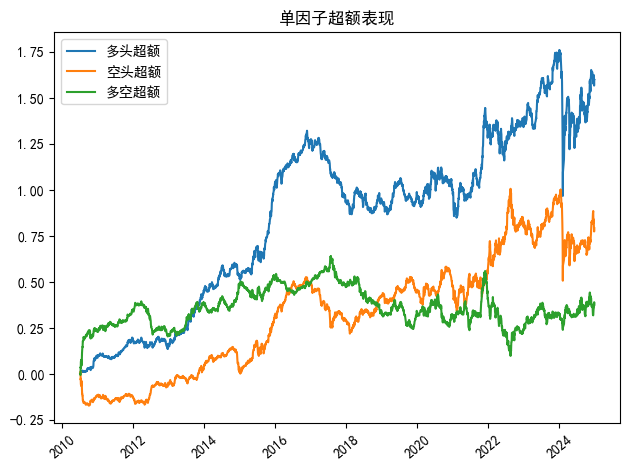

平均单边换手：0.285
年化交易成本:0.011 (未在超额中扣除)


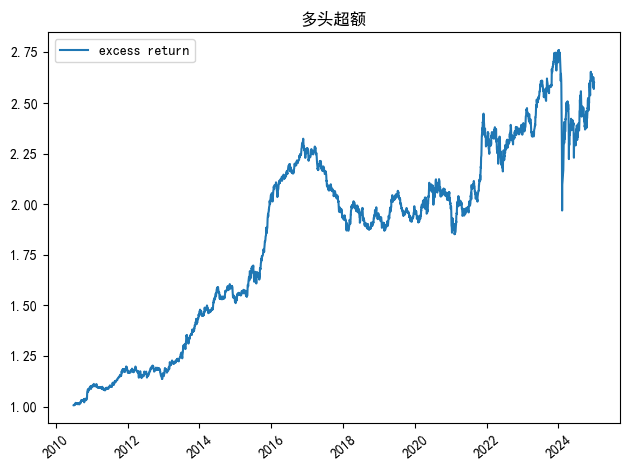

Rank IC: 0.18%
Rank ICIR: 0.03
t值: 0.33
年化收益率: 8.31%
年化波动率: 8.08%
信息比率: 1.03
最大回撤: 32.99%


In [40]:
res3=config.backtest_stand(tech_momentum_factor_diff_industry,top=300,fre='month',stock_pool='888888')
# Rank IC
rank_ic = res3['ic']['ic'].mean()
# Rank ICIR
rank_icir = res3['ic']['ic'].mean() / res3['ic']['ic'].std()
# t值
t_value = res3['ic']['ic'].mean() / (res3['ic']['ic'].std() / np.sqrt(res3['ic']['ic'].count()))
perf = res3['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

## 相关性分析

可用的Barra因子: ['SIZE', 'SIZENL', 'EARNYILD', 'GROWTH', 'LEVERAGE', 'BTOP', 'LIQUIDTY', 'MOMENTUM', 'RESVOL', 'BETA']
共同时间点: 178个
时间范围: 2010-02-26 到 2024-11-29
市值      :   -0.96% (基于178个时间点)
非线性市值   :   -0.02% (基于178个时间点)
盈利      :   -0.64% (基于178个时间点)
成长      :    0.64% (基于178个时间点)
杠杆      :   -0.56% (基于178个时间点)
分红      :   -0.75% (基于178个时间点)
流动性     :    0.56% (基于178个时间点)
反转      :    0.17% (基于178个时间点)
波动率     :    0.13% (基于178个时间点)
贝塔      :    1.43% (基于178个时间点)


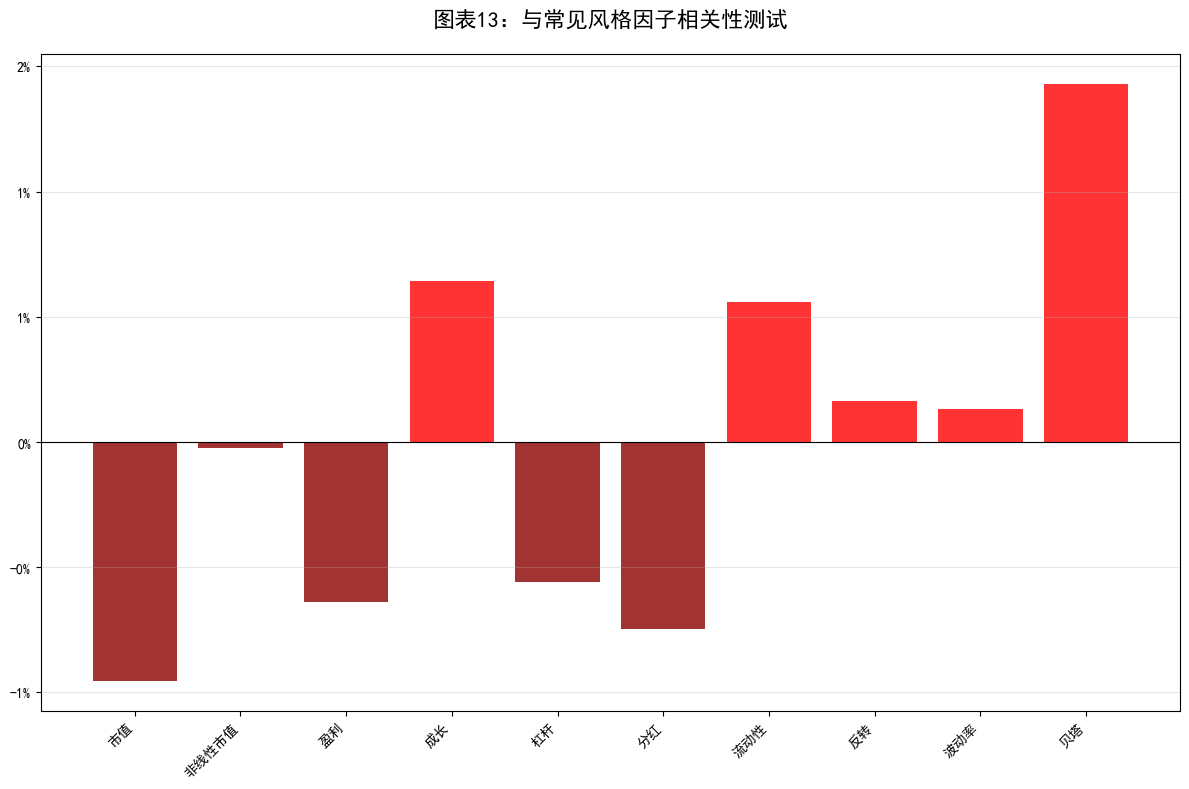

In [86]:
## 相关性分析
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# =============================================================================
# Barra因子mapping
# =============================================================================
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\barra_df_tl.pkl', 'rb') as f:
    barra_df_tl = pickle.load(f)
barra_factor_mapping = {
    'SIZE': '市值',
    'SIZENL': '非线性市值', 
    'EARNYILD': '盈利',
    'GROWTH': '成长',
    'LEVERAGE': '杠杆',
    'BTOP': '分红',
    'LIQUIDTY': '流动性',
    'MOMENTUM': '反转',
    'RESVOL': '波动率',
    'BETA': '贝塔'
}

print(f"可用的Barra因子: {list(barra_factor_mapping.keys())}")

# =============================================================================
# 计算相关性
# ============================================================================


def calculate_factor_correlation(final_factor, barra_data, factor_mapping):
    """
    计算final_factor与各Barra因子的相关性
    """
    correlations = {}
    p_values = {}
    
    # 获取共同的时间点
    common_dates = []
    for date in final_factor.index:
        if date in barra_data.index:
            common_dates.append(date)
    
    print(f"共同时间点: {len(common_dates)}个")
    print(f"时间范围: {min(common_dates)} 到 {max(common_dates)}")
    
    if len(common_dates) < 3:
        print("共同时间点太少，无法计算相关性")
        return None, None
    
    # 对每个Barra因子计算相关性
    for eng_name, chn_name in factor_mapping.items():
        factor_corrs = []
        
        # 对每个共同日期计算截面相关性
        for date in common_dates:
            try:
                # 获取final_factor在该日期的值
                final_scores = final_factor.loc[date].dropna()
                
                # 获取Barra因子在该日期的值
                if isinstance(barra_data.loc[date], dict):
                    # 如果barra_data是字典格式
                    barra_scores = pd.Series(barra_data.loc[date][eng_name])
                else:
                    # 如果barra_data是其他格式
                    barra_scores = barra_data.loc[date][eng_name]
                
                # 找到共同股票
                common_stocks = list(set(final_scores.index) & set(barra_scores.index))
                
                if len(common_stocks) > 50:  # 至少50只股票才计算相关性
                    final_aligned = final_scores.reindex(common_stocks).dropna()
                    barra_aligned = barra_scores.reindex(common_stocks).dropna()
                    
                    # 再次对齐（去除任一因子为空的股票）
                    final_common = final_aligned.reindex(barra_aligned.index).dropna()
                    barra_common = barra_aligned.reindex(final_common.index).dropna()
                    
                    if len(final_common) > 20:
                        corr, _ = pearsonr(final_common, barra_common)
                        if not np.isnan(corr):
                            factor_corrs.append(corr)
                            
            except Exception as e:
                print(f"计算{date}的{eng_name}相关性时出错: {e}")
                continue
        
        # 计算平均相关性
        if len(factor_corrs) > 0:
            avg_corr = np.mean(factor_corrs)
            correlations[chn_name] = avg_corr
            print(f"{chn_name:8s}: {avg_corr:8.2%} (基于{len(factor_corrs)}个时间点)")
        else:
            print(f"{chn_name}: 无法计算相关性")
    
    return correlations

# 计算相关性
correlations = calculate_factor_correlation(tech_momentum_factor, barra_df_tl, barra_factor_mapping)

# =============================================================================
# 绘制相关性图表
# =============================================================================

if correlations and len(correlations) > 0:
    
    # 准备绘图数据
    factors = list(correlations.keys())
    corr_values = [correlations[factor] for factor in factors]
    
    # 创建颜色（正相关用红色，负相关用深红色）
    colors = ['red' if corr >= 0 else 'darkred' for corr in corr_values]
    
    # 绘制柱状图
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(factors)), corr_values, color=colors, alpha=0.8)
    
    # 设置图表属性
    plt.title('图表13：与常见风格因子相关性测试', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('')
    plt.ylabel('')
    
    # 设置x轴标签
    plt.xticks(range(len(factors)), factors, rotation=45, ha='right')
    

    # 添加零线
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # 设置y轴格式
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0%}'))
    
    # 调整布局
    plt.tight_layout()

    plt.grid(True, alpha=0.3, axis='y')
    plt.show()
    
